In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('SampleSuperstore.csv')

# 2. Basic Inspection
print("Shape:", df.shape)
print("\nMissing Values %:\n", df.isnull().mean() * 100)
df.info()
df.head()

Shape: (9994, 13)

Missing Values %:
 Ship_Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal_Code     0.0
Region          0.0
Category        0.0
Sub_Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal_Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub_Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      99

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Statistical Summary
print(df.describe())

        Postal_Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


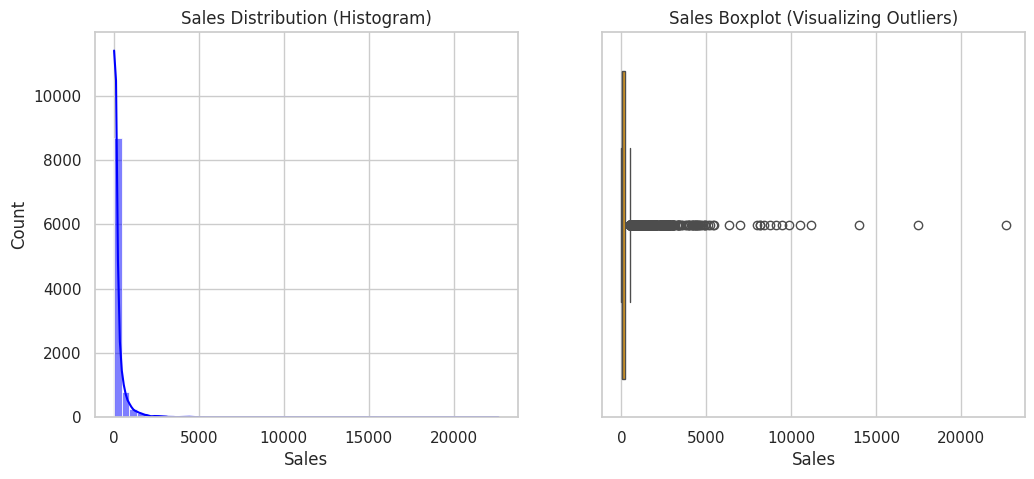

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Plot Sales Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True, color='blue')
plt.title('Sales Distribution (Histogram)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sales'], color='orange')
plt.title('Sales Boxplot (Visualizing Outliers)')

plt.show()

In [5]:
# Function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

low, high = detect_outliers(df, 'Sales')
print(f"Sales Outlier Thresholds: Below {low:.2f} or Above {high:.2f}")

# Flag Outliers in a new column
df['is_outlier'] = np.where((df['Sales'] < low) | (df['Sales'] > high), 'Yes', 'No')

# Check how many outliers we have
print(df['is_outlier'].value_counts())

Sales Outlier Thresholds: Below -271.71 or Above 498.93
is_outlier
No     8827
Yes    1167
Name: count, dtype: int64


In [6]:
# Capping (Winsorizing): Replace huge values with the upper limit
df_clean = df.copy()
df_clean['Sales'] = np.where(df_clean['Sales'] > high, high, df_clean['Sales'])

print("Max Sales Before Capping:", df['Sales'].max())
print("Max Sales After Capping:", df_clean['Sales'].max())

Max Sales Before Capping: 22638.48
Max Sales After Capping: 498.93


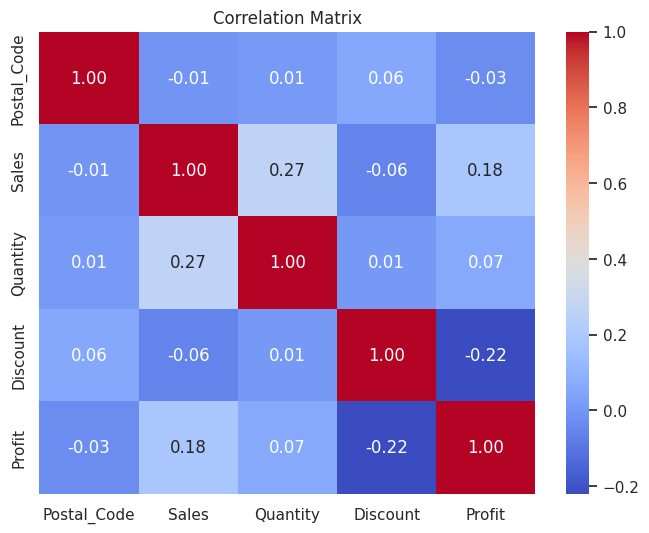

In [7]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=[np.number])

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Save cleaned data
df_clean.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!
